In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sys
# Add project root to Python path so we can import modules from src/
# Notebook is in 'notebooks/' folder, src/ is in parent directory
sys.path.append("../")
from src.visualization import plot_histogram, plot_box, plot_scatter, plot_correlation_heatmap, plot_count

In [2]:
# Load and processed data
df = pd.read_csv("../data/processed.csv", sep=',')

In [3]:
# 1. Descriptive Statistics
print("Descriptive Statistics for numeric columns:")
desc = df.describe().round(2)
desc.rename(index={"50%": "50% (median)"}, inplace=True)
display(desc)


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Store outlier info for reporting
outlier_summary = {}

print("Outliers detected using IQR method:\n")

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    outlier_count = len(outliers)
    outlier_summary[col] = outlier_count

    print(f"{col}: {outlier_count} outlier(s)")

Descriptive Statistics for numeric columns:


,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Walc,health,absences,G1,G2,G3,avg_grade,pass_fail,total_alcohol,support_score
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,...,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,0.53,16.70,2.75,2.52,1.45,2.04,0.33,0.13,0.61,0.46,...,2.29,3.55,5.19,10.91,10.81,10.42,10.71,0.67,3.77,1.20
std,0.50,1.28,1.09,1.09,0.70,0.84,0.74,0.34,0.49,0.50,...,1.29,1.39,5.69,3.32,3.51,4.58,3.63,0.47,1.98,0.88
min,0.00,15.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,...,1.00,1.00,0.00,3.00,3.00,0.00,2.33,0.00,2.00,0.00
25%,0.00,16.00,2.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,...,1.00,3.00,0.00,8.00,9.00,8.00,8.33,0.00,2.00,0.00
50% (median),1.00,17.00,3.00,2.00,1.00,2.00,0.00,0.00,1.00,0.00,...,2.00,4.00,4.00,11.00,11.00,11.00,10.67,1.00,3.00,1.00
75%,1.00,18.00,4.00,3.00,2.00,2.00,0.00,0.00,1.00,1.00,...,3.00,5.00,8.00,13.00,13.00,14.00,13.33,1.00,5.00,2.00
max,1.00,22.00,4.00,4.00,4.00,4.00,3.00,1.00,1.00,1.00,...,5.00,5.00,20.00,19.00,19.00,20.00,19.33,1.00,10.00,3.00


Outliers detected using IQR method:

sex: 0 outlier(s)
age: 1 outlier(s)
Medu: 0 outlier(s)
Fedu: 2 outlier(s)
traveltime: 8 outlier(s)
studytime: 27 outlier(s)
failures: 83 outlier(s)
schoolsup: 51 outlier(s)
famsup: 0 outlier(s)
paid: 0 outlier(s)
activities: 0 outlier(s)
nursery: 81 outlier(s)
higher: 20 outlier(s)
internet: 66 outlier(s)
romantic: 0 outlier(s)
famrel: 26 outlier(s)
freetime: 19 outlier(s)
goout: 0 outlier(s)
Dalc: 18 outlier(s)
Walc: 0 outlier(s)
health: 0 outlier(s)
absences: 0 outlier(s)
G1: 0 outlier(s)
G2: 0 outlier(s)
G3: 0 outlier(s)
avg_grade: 0 outlier(s)
pass_fail: 0 outlier(s)
total_alcohol: 9 outlier(s)
support_score: 0 outlier(s)


### Outlier Analysis

Outliers in the dataset were detected using the **Interquartile Range (IQR) method** for all numeric features. Here's summary of notable findings:

| Column | Outliers | Notes                                                                                                                                 |
|--------|----------|---------------------------------------------------------------------------------------------------------------------------------------|
| **age** | 1 | A single student slightly outside the typical age range. Probably a special case.                                                     |
| **traveltime** | 8 | Some students show unusually long travel times.                                                                                       |
| **failures** | 83 | Many students have unusually high numbers of past failures. These are valid but indicate risk of poor academic performance. |
| **studytime** | 27 | A number of students report high or low study time beyond the central range. Reflects actual variation in study habits.               |
| **schoolsup** | 51 | Students receiving school support appear as outliers due to binary distribution (0/1). Binary columns often show “outliers” with IQR. |
| **nursery** | 81 | Similarly, students attending nursery school are flagged as outliers due to binary nature.                                            |
| **higher** | 20 | Again, due to binary nature.                                                                                                          |
| **internet** | 66 | Again, due to binary nature.                                                                                                                              |
| **famrel** | 26 | Lower-than-typical family relationship scores.                                                                                        |
| **freetime** | 19 | Students with very low or very high free time.                                                                                        |
| **Dalc** | 18 | High daily alcohol consumption for a few students.                                                                                    |
| **total_alcohol** | 9 | Combined daily + weekend alcohol shows a few extreme cases.                                                                           |

**Columns with 0 outliers:** `sex, Medu, famsup, paid, activities, romantic, goout, failures, Walc, health, absences, G1, G2, G3, avg_grade, pass_fail, support_score`.
- These features are either already capped using IQR, categorical, or have values clustered in the center.

### Interpretation & Decisions

1. **Binary Columns (`schoolsup`, `nursery`, `internet`, `higher`)**
   - IQR flags extreme values in binary features as “outliers.”
   - **Decision:** Keep them since they reflect real categorical distribution.

2. **Behavioral Indicators (`Dalc`, `total_alcohol`, `famrel`, `freetime`)**
   - Extreme values highlight students with unusual lifestyle patterns.
   - **Decision:** keep them since they may be predictive features.

3. **Travel & Study (`traveltime`, `studytime`)**
   - Outliers reflect students with unusual study habits or commute times.
   - **Decision:** Preserve the variability.

4. **Age and Parental Education (`age`)**
   - Outliers are very few; likely rare data points.
   - **Decision:** Keep them since it causes minimal impact on modeling.

5. **Academic Performance(`failures`)**
    - Some students have unusually high failure counts, but final grades (G1–G3) are within reasonable bounds.
   - **Decision:** Keep them since they may be predictive features.


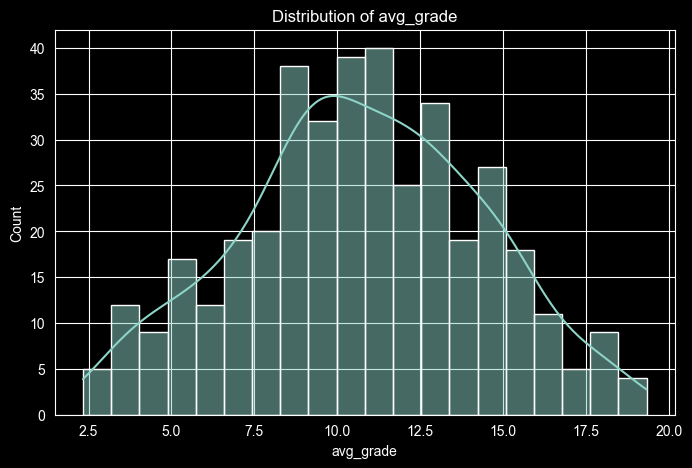

In [4]:
# 2. Static Visualizations

# 2.1 Histogram of average grade
plot_histogram(df, "avg_grade")

#### Histogram of Average Grades
The histogram of `avg_grade` reveals:

- Peak (Mode): Around 10-11 - this is the most common average grade range
- Center: The distribution appears centered around 10-11, indicating most students perform in this middle range
- Range: Grades span from about 2.5 to 20 (nearly the full possible range)
- Most common range: 70-80% fall between 7 and 14
- Concentration: There's a strong concentration of students in the 8-12 range
- Relatively few students with very low grades (below 5)
- Fewer students with very high grades (above 16)

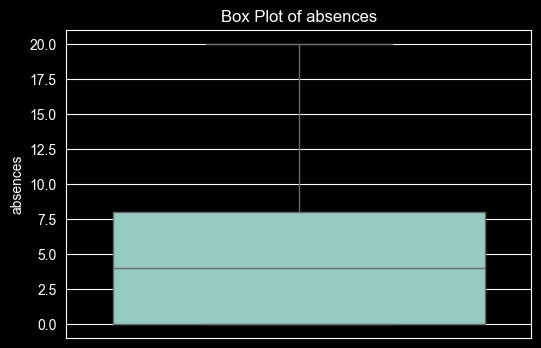

In [5]:
# 2.2 Boxplot of absences
plot_box(df, "absences")

#### Boxplot of Absences
- Q1 (bottom edge): 0 absences - 25% of students have zero absences
- Median (line in middle): 4 absences - half the students have 4 or fewer absences, half have 4 or more
- Q3 (top edge): 8 absences - 75% of students have 8 or fewer absences
- The middle 50% of students (the IQR) have between roughly 0-7.5 absences
- The range is compact, suggesting most students have similar, relatively low absence patterns (this is because we capped)
- The best attendance is zero absences
- The worst attendance is 20 absences
- **No outliers:** All data points fall within the expected range (because we've already capped outliers)
- The data is heavily right-skewed (positively skewed) - the median is much closer to Q1 than to Q3
- Most students cluster at the lower end (0-4 absences)
- A smaller group has moderate to high absences (8-20 range)

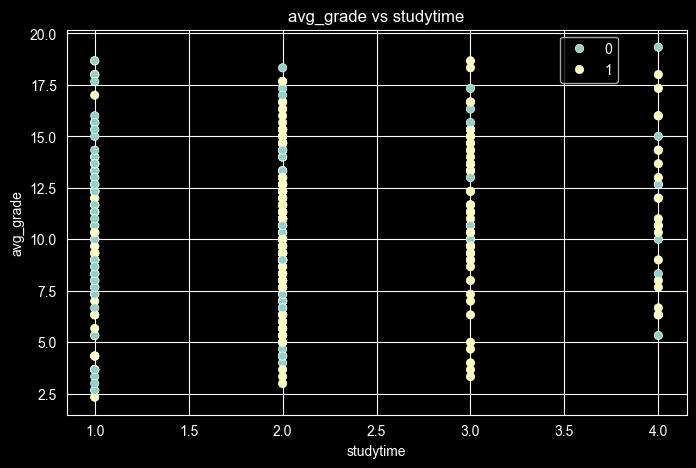

In [6]:
# 2.3 Scatter plot studytime vs avg_grade colored by sex
plot_scatter(df, "studytime", "avg_grade", hue="sex",
             legend_pos={'bbox_to_anchor': (0.9, 1), 'loc': 'upper right'})

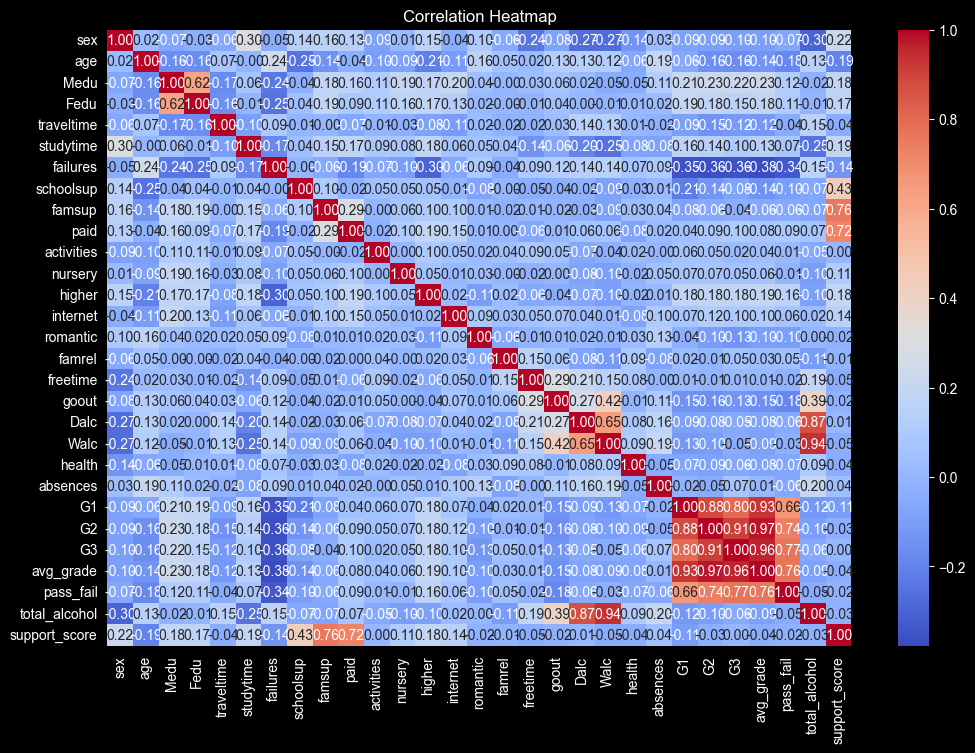

In [7]:
# 2.4 Correlation heatmap
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
plot_correlation_heatmap(df[numeric_cols])

#### Correlation Heatmap

##### **Strongest Positive Correlations (Red/Orange)**
**Academic performance variables cluster together:**

- G1 ↔ G2: 0.88 (very strong)
- G2 ↔ G3: 0.91 (very strong)
- G1 ↔ G3: 0.88 (very strong)
- avg_grade ↔ G1/G2/G3: 0.93-0.96 (extremely strong)

**Interpretation:** Past performance strongly predicts future performance

**Other notable positive correlations:**

- Medu ↔ Fedu: 0.62 (strong) - parents' education levels are correlated
- Walc ↔ Dalc: 0.65 (strong) - weekend and weekday alcohol consumption are related
- total_alcohol ↔ Walc/Dalc: 0.87-0.94 (very strong) - naturally, as total is derived from these
- failures ↔ absences: 0.35 (moderate) - students with past failures have more absences
- goout ↔ freetime: 0.27 (weak to moderate) - students with more free time go out more

##### **Strongest Negative Correlations (Blue)**
**Failures and academic performance:**

- failures ↔ G1: -0.35 (moderate negative)
- failures ↔ G2: -0.36 (moderate negative)
- failures ↔ G3: -0.38 (moderate negative)
- failures ↔ avg_grade: -0.36 (moderate negative)

**Interpretation:** Past course failures are one of the clearer predictors of lower current performance.

**Lifestyle factors and performance:**

- total_alcohol ↔ avg_grade: -0.20 (weak negative)
- Walc ↔ avg_grade: -0.25 (weak negative)
- Dalc ↔ avg_grade: -0.20 (weak negative)
- absences ↔ avg_grade: -0.20 (weak negative)

**Interpretation:** Alcohol consumption and absences are associated with lower grades, though the relationships are relatively weak.

##### **Interesting Findings**
**Parental education and grades:**

- Medu ↔ avg_grade: 0.18 (very weak positive)
- Fedu ↔ avg_grade: 0.17 (very weak positive)
- Medu ↔ failures: 0.24 (weak positive) - counterintuitive
- Fedu ↔ failures: 0.25 (weak positive) - counterintuitive

- Surprising: Despite what the box plots suggested, here we see that parental education alone doesn't strongly predict grades. And unexpectedly, higher parental education showed more failed past courses.

##### **Weak or no correlations (near zero):**

- sex ↔ most variables: Gender shows minimal correlation with academic performance
- romantic ↔ grades: 0.05 (essentially no correlation) - being in a relationship doesn't affect grades
- internet ↔ grades: 0.14 (very weak) - internet access barely correlates with performance
- studytime ↔ grades: 0.19 (weak) - surprisingly low correlation!
- studytime ↔ failures: 0.08 (essentially none)
- activities ↔ grades: 0.00 (no correlation)
- nursery ↔ grades: 0.11 (very weak)

##### **Conclusions**
- Past grades predict current grades (0.88-0.96)
- Past failures show moderate negative correlation with all current grades (-0.35 to -0.38)
- Failures and absences are linked (0.35), suggesting a pattern of disengagement
- Alcohol consumption shows consistent negative relationships with grades (-0.20 to -0.25)
- Extracurricular activities show zero correlation with grades
- Missing class correlates negatively with performance (-0.20)

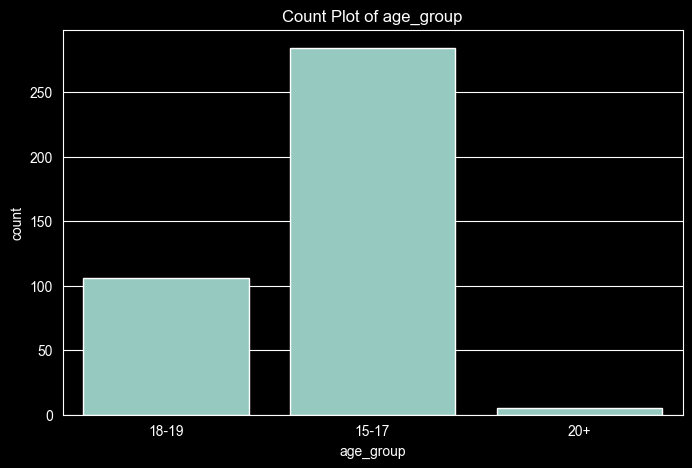

In [8]:
# 2.5 Count plot of age_group
plot_count(df, "age_group")

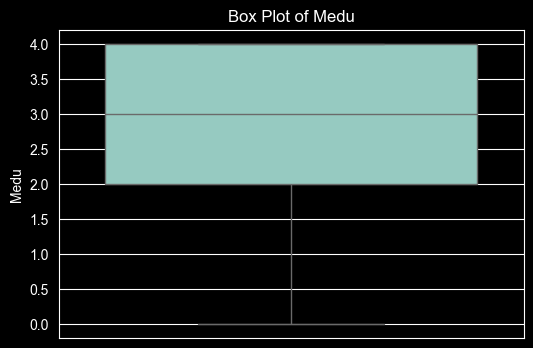

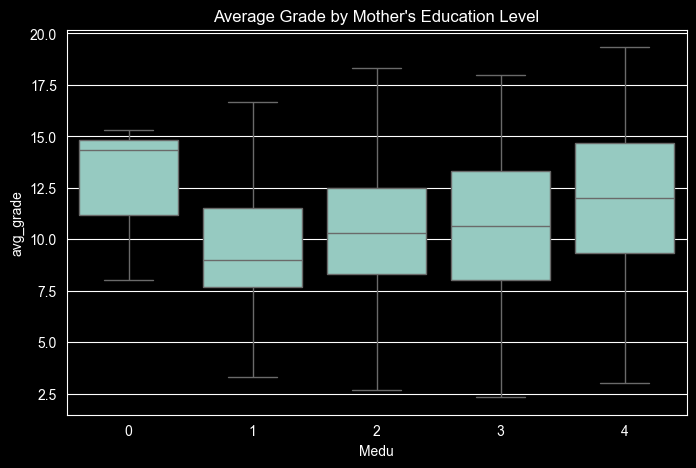

In [9]:
# 3. Parental Education Impact

# Mother education vs avg_grade
plot_box(df, "Medu")
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Medu", y="avg_grade")
plt.title("Average Grade by Mother's Education Level")
plt.savefig("../reports/figures/Medu_vs_avg_grade_boxplt.png")
plt.show()

#### Boxplot of Medu
- Q1 (bottom edge): 2 - 25% of mothers have education level 2 or below
- Median (line in middle): 3 - half of mothers have education level 3 or below
- Q3 (top edge): 4 - 75% of mothers have education level 4 or below
- **No visible outliers:** All data points fall within the normal range
- Most common: Level 3-4 (secondary to higher education)
- Median of 3: The typical mother has completed secondary education
- Limited range: Most mothers fall within a 2-3 point range, suggesting relative homogeneity in educational background

#### Boxplot of avg_grade vs Medu
**Medu = 0 (No education):**

- Median: ~14.5
- IQR: Roughly 11-15
- Range: ~10-15
- Surprisingly high performance despite the lowest parental education
- Small sample (narrow box suggests few students in this category)

**Medu = 1 (Primary education):**

- Median: ~9
- IQR: Roughly 7.5-11.5
- Range: ~3-17
- Lowest median of all groups
- Widest range with outliers extending very low (~3) and high (~17)
- Most variable performance

**Medu = 2 (Middle school):**

- Median: ~10
- IQR: Roughly 8.5-12.5
- Range: ~7.5-18
- Slight improvement over level 1
- Still considerable spread in performance

**Medu = 3 (Secondary education):**

- Median: ~10.5
- IQR: Roughly 7.5-13
- Range: ~7-18
- Similar to level 2 with marginal improvement
- Wide variation remains

**Medu = 4 (Higher education):**

- Median: ~12
- IQR: Roughly 9-14.5
- Range: ~3-19
- Highest median overall
- Still shows significant spread but with better central tendency
- Upper whisker extends to nearly 19 (top performance)

**Patterns, Trends, and Anomalies**
- Positive correlation: There's a general upward trend - students whose mothers have higher education (level 4) tend to perform better on average
- Mother's education is not the only factor determining student success
Other variables (student motivation, resources, teaching quality, etc.) play important roles
- Anomaly at level 0: The surprisingly high median at level 0 is unusual but may be due to:
    * Very small sample size (making it less reliable)
    * Selection bias or other confounding factors

- Outliers throughout: Every education level shows students performing at both extremes, indicating that:
    * High-achieving students exist regardless of parental education
    * Struggling students also exist at all levels

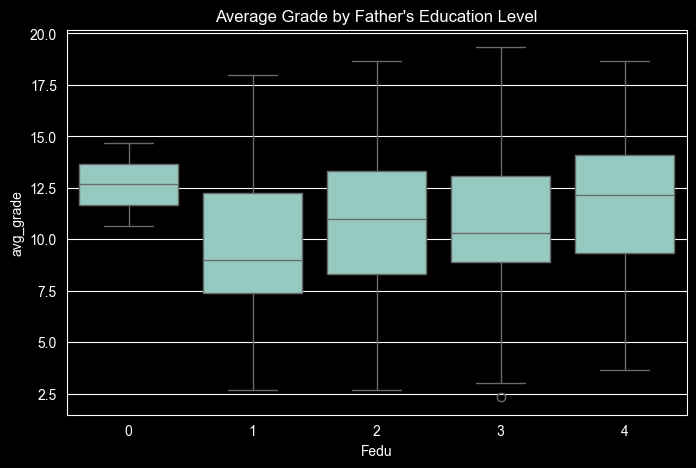

In [10]:
# Father education vs avg_grade
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Fedu", y="avg_grade")
plt.title("Average Grade by Father's Education Level")
plt.savefig("../reports/figures/Fedu_vs_avg_grade_boxplt.png")
plt.show()

#### Boxplot of avg_grade vs Fedu
**Fedu = 0 (No education):

- Median: ~13
- IQR: Roughly 11.5-13.5
- Range: ~10.5-14.5
- Relatively high performance with tight clustering
- Small, compact box suggests limited sample size and low variability

**Fedu = 1 (Primary education):**

- Median: ~9
- IQR: Roughly 7.5-12.5
- Range: ~7.5-17.5
- Lowest median of all groups
- Wide spread indicating high variability in performance
- Similar pattern to Medu = 1

**Fedu = 2 (Middle school):**

- Median: ~11
- IQR: Roughly 8.5-13
- Range: ~7.5-18.5
- Moderate improvement over level 1
- Still considerable variation in outcomes

**Fedu = 3 (Secondary education):**

- Median: ~10.5
- IQR: Roughly 9-13
- Range: ~2.5-19.5 (with outlier at ~2.5)
- Surprising dip - actually lower median than level 2
- Contains a significant low outlier
- Wide range from lowest to highest performers

**Fedu = 4 (Higher education):**

- Median: ~12
- IQR: Roughly 9.5-14
- Range: ~4-18.5
- Highest median overall
- Still shows substantial spread
- Better central tendency but not dramatically different from other levels

**Patterns, Trends, and Anomalies**
- Weaker relationship than mother's education: The differences between father's education levels are smaller and less consistent than observed with mother's education
- Non-monotonic pattern: Unlike mother's education, there's a dip at level 3 (lower than level 2), suggesting the relationship isn't straightforward
- High variability across all levels: Every education level shows:
    * Large IQRs (wide boxes)
    * Substantial overlap between adjacent groups

- Outliers present: Particularly at level 3, there's a significant low outlier around 2.5, showing that even with well-educated fathers, some students struggle
- Modest improvement at highest level: Fedu = 4 shows the best outcomes but only marginally better than levels 2-3

In [11]:
# Interactive Plotly versions
fig = px.box(df, x="Medu", y="avg_grade", points="all", title="Avg Grade vs Mother's Education")
fig.show()

In [12]:
fig = px.box(df, x="Fedu", y="avg_grade", points="all", title="Avg Grade vs Father's Education")
fig.show()

In [13]:
# 4. Interactive Plotly Visualizations
# Interactive histogram of avg_grade
plot_histogram(df, "avg_grade", interactive=True)

In [14]:
# Interactive scatter plot studytime vs avg_grade
plot_scatter(df, "studytime", "avg_grade", hue="sex", interactive=True)

In [15]:
# Interactive correlation heatmap
plot_correlation_heatmap(df[numeric_cols], interactive=True)